## Importing neccesary modules

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# for model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import r2_score

In [3]:
df = pd.read_csv("processed_stock.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-27,122.800003,122.800003,119.820000,120.332497,88.088272,30646000.0
1,2004-08-30,121.237503,123.750000,120.625000,123.345001,90.293549,24465208.0
2,2004-08-31,123.312500,123.750000,122.000000,123.512497,90.416122,21194656.0
3,2004-09-01,123.750000,124.375000,122.949997,123.487503,90.397820,19935544.0
4,2004-09-02,123.737503,125.574997,123.250000,124.207497,90.924896,21356352.0


In [4]:
X = df.drop(columns=["Date", "Adj Close", "Close"])
Y = df["Close"]

In [5]:
X.head(2)

,Open,High,Low,Volume
0,122.800003,122.800003,119.820,30646000.0
1,121.237503,123.750000,120.625,24465208.0


In [6]:
Y.head(2)

0    120.332497
1    123.345001
Name: Close, dtype: float64

In [7]:
# Spliting The Dataset
X_train = X[1000:]
Y_train = Y[1000:]

X_test = X[:1000]
Y_test = Y[:1000]

In [8]:
X_test.shape, Y_test.shape

((1000, 4), (1000,))

In [9]:
X_train.shape, Y_train.shape

((3494, 4), (3494,))

In [10]:
model = RandomForestRegressor()
model.fit(X_train, Y_train)

RandomForestRegressor()

In [11]:
pred = model.predict(X_test)

In [12]:
# r2 score
Y_true = Y_test.to_numpy()
score = r2_score(Y_true, pred)
print(score)

0.9965166701657714


In [13]:
def FirstTenValues(Y_true, Y_pred):
    for i in range(10):
        print(f"Actual Value = {Y_true[i]}, Predicted Value = {Y_pred[i]}")

In [14]:
FirstTenValues(Y_true, pred)

Actual Value = 120.332497, Predicted Value = 121.95987445999995
Actual Value = 123.345001, Predicted Value = 122.65887408999996
Actual Value = 123.512497, Predicted Value = 123.12587399999992
Actual Value = 123.487503, Predicted Value = 123.25174916999995
Actual Value = 124.207497, Predicted Value = 123.64649898999997
Actual Value = 124.732498, Predicted Value = 131.93862608
Actual Value = 124.357498, Predicted Value = 126.63999984
Actual Value = 124.449997, Predicted Value = 126.78674970999997
Actual Value = 124.212502, Predicted Value = 123.93412394999994
Actual Value = 122.495003, Predicted Value = 123.29849917999995


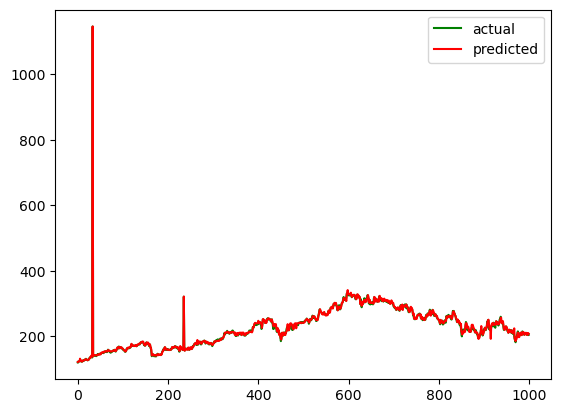

In [15]:
plt.plot(Y_true, color="g", label="actual")
plt.plot(pred, color="r", label="predicted")
plt.legend()

## Using LSTM

In [147]:
from keras.layers import Dense, LSTM, Input, Dropout
from keras import Sequential
import tensorflow as tf

In [141]:
X_train_ = X.to_numpy()
Y_train_ = Y.to_numpy()

In [142]:
X_train_ = X_train_.reshape(X_train_.shape[0], X_train_.shape[1], 1)
Y_train_ = Y_train_.reshape(Y_train_.shape[0], 1)

In [143]:
X_train_.shape, Y_train_.shape

((4494, 4, 1), (4494, 1))

In [149]:
model = Sequential([
    Input(shape=(4, 1)),
    LSTM(200, return_sequences=True, dropout=0.2),
    LSTM(400, return_sequences=True, dropout=0.2),
    LSTM(300, return_sequences=True, dropout=0.2),
    LSTM(100),
    Dense(200, activation="relu"),
    Dropout(0.2),
    Dense(1, activation="linear")
])

In [150]:
model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_58 (LSTM)              (None, 4, 200)            161600    
                                                                 
 lstm_59 (LSTM)              (None, 4, 400)            961600    
                                                                 
 lstm_60 (LSTM)              (None, 4, 300)            841200    
                                                                 
 lstm_61 (LSTM)              (None, 100)               160400    
                                                                 
 dense_61 (Dense)            (None, 200)               20200     
                                                                 
 dropout (Dropout)           (None, 200)               0         
                                                                 
 dense_62 (Dense)            (None, 1)               

In [151]:
model.compile(
    loss="mean_squared_error",
    optimizer = "adam",
)

In [152]:
hist = model.fit(X_train_, Y_train_, epochs=20)

Epoch 1/20
141/141 [==============================] - 39s 152ms/step - loss: 1987548.0000
Epoch 2/20
141/141 [==============================] - 22s 159ms/step - loss: 1182446.2500
Epoch 3/20
141/141 [==============================] - 24s 168ms/step - loss: 991253.6250
Epoch 4/20
141/141 [==============================] - 24s 172ms/step - loss: 1038700.0000
Epoch 5/20
141/141 [==============================] - 27s 188ms/step - loss: 675339.6875
Epoch 6/20
141/141 [==============================] - 32s 227ms/step - loss: 355539.8750
Epoch 7/20
141/141 [==============================] - 32s 228ms/step - loss: 223036.3125
Epoch 8/20
141/141 [==============================] - 31s 219ms/step - loss: 208354.8594
Epoch 9/20
141/141 [==============================] - 31s 221ms/step - loss: 122319.7969
Epoch 10/20
141/141 [==============================] - 30s 210ms/step - loss: 127774.5078
Epoch 11/20
141/141 [==============================] - 34s 242ms/step - loss: 128497.9453
Epoch 12/20
141/

In [153]:
pred = model.predict(X_train_)

141/141 [==============================] - 10s 49ms/step


In [157]:
r2_score(Y_train_, pred)

0.9591166590080787

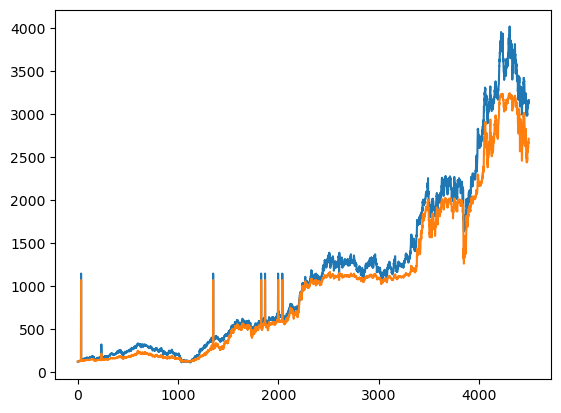

In [164]:
plt.plot(Y_train_)
plt.plot(pred)